This notebook contains the analysis of the processed emerson data: distributions of V- and J- gene combinations, deletions on V- gene and J-gene, CDR3 length, and deletions on invidual V- and J- genes. The figures are saved on `figures` directory locating on the same root as this notebook.

In [1]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import pandas as pd 
import os 
from tqdm import tqdm 

In [2]:
# Location of the processed emerson data 
# Use process_data.py script to process the pure emerson data
data_path = os.path.join(os.getcwd(), os.pardir, "data", "emerson", "emerson_processed")

If the `whole_data_flag` is set `True`, the whole dataset is utilised for the analysis. Otherwise the trainset is utilised.  

In [3]:
whole_data_flag = False

In [4]:
if whole_data_flag:
    whole_data = pd.read_csv(os.path.join(data_path, "whole_seqs_nn.tsv"), sep = '\t')
    data = whole_data
else:
    train_data = pd.read_csv(os.path.join(data_path, "whole_seqs_nn_train.tsv"), sep = '\t')
    data = train_data

In [5]:
len(data)

26427244

# V- and J-gene combinations distribution

In [ ]:
v_genes = data.loc[:,"v"]
j_genes = data.loc[:,"j"]

In [ ]:
@numba.jit(forceobj=True)
def create_combinations(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append(f'{data[i, 3]}, {data[i, 6]}')
    return result 

In [ ]:
v_j_combinations = create_combinations(data.to_numpy())

In [ ]:
gene_count = {}
for comb in tqdm(v_j_combinations, total = data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in gene_count.keys():
        gene_count[key] = 1
    else:
        gene_count[key] += 1
gene_count.update((x, y/data.shape[0]) for x, y in gene_count.items())

In [ ]:
gene_count_sorted = dict(sorted(gene_count.items(), key = lambda x: x[1], reverse= True))

In [ ]:
sum(gene_count_sorted.values())


In [ ]:
fig = plt.figure(figsize=(50,50))
plt.bar(x=list(gene_count_sorted.keys()), height= list(gene_count_sorted.values()), align='edge')
plt.xticks(rotation=-90)
plt.show

### Latex codes generation for the tables

The table is divided in to seven parts to fit the tables on pages of the latex document.

To use the tables just copy the printed latex codes and paste them to your document. You may need to add following lines around the printed latex codes:

<code>\begin{table}[]
\centering
\caption{Your caption}    
%%% Paste the printed table here%%% 
\end{table}
</code>

In [ ]:
indx = int(len(gene_count_sorted)/7)

In [ ]:
def gene_combination(begin_indx, end_indx):
    print(pd.DataFrame(data={'gene combination': list(gene_count_sorted.keys())[begin_indx:end_indx], 'fraction (%)': [f'{i*100:.3}'for i in list(gene_count_sorted.values())[begin_indx:end_indx]]}).to_latex(index=False))

In [ ]:
gene_combination(0, indx)
gene_combination(indx, 2*indx)
gene_combination(2*indx, 3*indx)
gene_combination(3*indx, 4*indx)
gene_combination(4*indx, 5*indx)
gene_combination(5*indx, 6*indx)
gene_combination(6*indx, len(gene_count_sorted))

# distribution of deletions of v gene  

In [6]:
v_deletions= data.loc[:,"v_deletions"]

In [7]:
v_deletion_count = {}
for comb in tqdm(v_deletions, total = data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in v_deletion_count.keys():
        v_deletion_count[key] = 1
    else:
        v_deletion_count[key] += 1
v_deletion_count.update((x, y/data.shape[0]) for x, y in v_deletion_count.items())

100%|██████████| 26427244/26427244 [00:16<00:00, 1637949.79it/s]


In [8]:
v_deletion_count_sorted = dict(sorted(v_deletion_count.items(), key= lambda x: x[1], reverse=True))
v_deletion_count_sorted

{'4': 0.1742550225819991,
 '0': 0.15798030244848837,
 '5': 0.14453811377380102,
 '1': 0.11362755041728907,
 '2': 0.11088216387603642,
 '3': 0.10573380258645207,
 '6': 0.09144173338695477,
 '7': 0.05039125532726757,
 '8': 0.027274391533222305,
 '10': 0.010403809038884267,
 '9': 0.007379013869172283,
 '11': 0.004786575550594681,
 '12': 0.0008282740341747328,
 '13': 0.00027305155240554027,
 '14': 0.0001358068211728775,
 '15': 6.058142120305848e-05,
 '22': 2.95149959640135e-06,
 '17': 8.703139835542442e-07,
 '18': 7.946345067234404e-07,
 '25': 7.567947683080384e-07,
 '21': 7.189550298926365e-07,
 '20': 6.811152914772346e-07,
 '19': 6.054358146464308e-07,
 '24': 3.405576457386173e-07,
 '23': 1.891986920770096e-07,
 '16': 1.891986920770096e-07,
 '34': 1.1351921524620577e-07,
 '28': 1.1351921524620577e-07,
 '30': 7.567947683080385e-08,
 '31': 3.783973841540193e-08,
 '27': 3.783973841540193e-08,
 '36': 3.783973841540193e-08,
 '26': 3.783973841540193e-08}

In [9]:
sum(list(v_deletion_count_sorted.values()))

1.0

In [10]:
print(pd.DataFrame(data={'number of deletions': list(v_deletion_count_sorted.keys()), 'fraction (%)': [f'{i *100:.3}' for i in v_deletion_count_sorted.values()]}).to_latex(index=False))

\begin{tabular}{ll}
\toprule
number of deletions & fraction (%) \\
\midrule
4 & 17.4 \\
0 & 15.8 \\
5 & 14.5 \\
1 & 11.4 \\
2 & 11.1 \\
3 & 10.6 \\
6 & 9.14 \\
7 & 5.04 \\
8 & 2.73 \\
10 & 1.04 \\
9 & 0.738 \\
11 & 0.479 \\
12 & 0.0828 \\
13 & 0.0273 \\
14 & 0.0136 \\
15 & 0.00606 \\
22 & 0.000295 \\
17 & 8.7e-05 \\
18 & 7.95e-05 \\
25 & 7.57e-05 \\
21 & 7.19e-05 \\
20 & 6.81e-05 \\
19 & 6.05e-05 \\
24 & 3.41e-05 \\
23 & 1.89e-05 \\
16 & 1.89e-05 \\
34 & 1.14e-05 \\
28 & 1.14e-05 \\
30 & 7.57e-06 \\
31 & 3.78e-06 \\
27 & 3.78e-06 \\
36 & 3.78e-06 \\
26 & 3.78e-06 \\
\bottomrule
\end{tabular}



In [11]:
sum(list(v_deletion_count_sorted.values())[:11])

0.9939071588395674

In [12]:
list(v_deletion_count_sorted.keys())[:11]

['4', '0', '5', '1', '2', '3', '6', '7', '8', '10', '9']

In [13]:
v_deletion_count_sorted = {int(k):v for k,v in v_deletion_count_sorted.items()}
v_deletion_count_sorted = dict(sorted(v_deletion_count_sorted.items(), reverse=False))

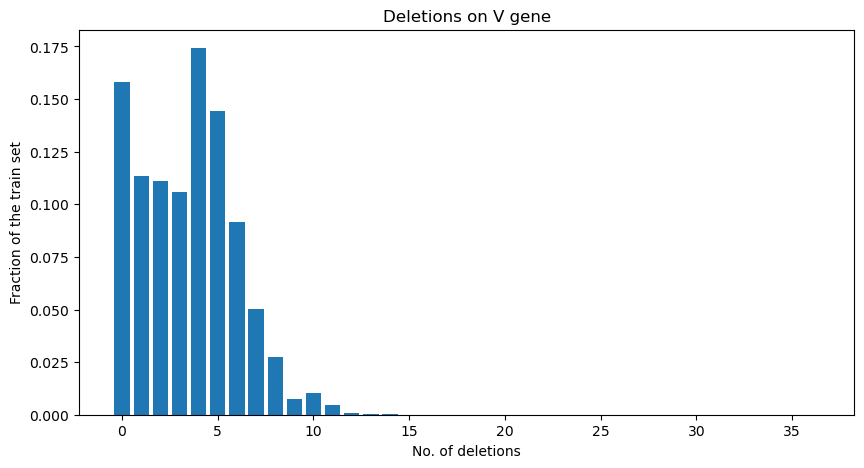

In [14]:
fig = plt.figure(figsize = (10,5))
plt.bar(v_deletion_count_sorted.keys(), v_deletion_count_sorted.values())
plt.title("Deletions on V gene")
plt.xlabel("No. of deletions")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures", "V_deletion_train.png"))

# distribution of deletions on J - genes  

In [15]:
j_deletions = data.loc[:,"j_deletions"]

In [16]:
j_deletion_count = {}
for comb in tqdm(j_deletions, total = data.shape[0], position=0, leave=True):
    key = str(comb)
    if key not in j_deletion_count.keys():
        j_deletion_count[key] = 1
    else:
        j_deletion_count[key] += 1
j_deletion_count.update((x, y/data.shape[0]) for x, y in j_deletion_count.items())

100%|██████████| 26427244/26427244 [00:18<00:00, 1445379.19it/s]


In [17]:
j_deletion_count_sorted = dict(sorted(j_deletion_count.items(), key= lambda x: x[1], reverse=True))
j_deletion_count_sorted

{'4': 0.13984269415304904,
 '0': 0.12716407355984605,
 '2': 0.1086587386864858,
 '5': 0.10558910342675157,
 '3': 0.10435991736406566,
 '6': 0.1006546123386911,
 '7': 0.08622609304246784,
 '1': 0.08070247506701796,
 '8': 0.0635915723940037,
 '9': 0.02805903634900408,
 '10': 0.020996968128799205,
 '11': 0.00973843507858784,
 '12': 0.006563037749982556,
 '15': 0.004116093225612175,
 '13': 0.003951528203243592,
 '17': 0.003685741880613809,
 '14': 0.0033957002856597534,
 '16': 0.0014933074368254215,
 '18': 0.00047148314065590795,
 '19': 0.0003325734609329675,
 '20': 0.000251936978369746,
 '21': 6.167877361710514e-05,
 '22': 5.524601808648681e-05,
 '23': 2.3120080171810575e-05,
 '25': 1.4833177458837554e-05}

In [18]:
print(pd.DataFrame(data={'number of deletions': list(j_deletion_count_sorted.keys()), 'fraction (%)': [f'{i *100:.3}' for i in j_deletion_count_sorted.values()]}).to_latex(index=False))

\begin{tabular}{ll}
\toprule
number of deletions & fraction (%) \\
\midrule
4 & 14.0 \\
0 & 12.7 \\
2 & 10.9 \\
5 & 10.6 \\
3 & 10.4 \\
6 & 10.1 \\
7 & 8.62 \\
1 & 8.07 \\
8 & 6.36 \\
9 & 2.81 \\
10 & 2.1 \\
11 & 0.974 \\
12 & 0.656 \\
15 & 0.412 \\
13 & 0.395 \\
17 & 0.369 \\
14 & 0.34 \\
16 & 0.149 \\
18 & 0.0471 \\
19 & 0.0333 \\
20 & 0.0252 \\
21 & 0.00617 \\
22 & 0.00552 \\
23 & 0.00231 \\
25 & 0.00148 \\
\bottomrule
\end{tabular}



In [19]:
sum(list(j_deletion_count_sorted.values())[:12])

0.97558371958877

In [20]:
list(j_deletion_count_sorted.keys())[:12]

['4', '0', '2', '5', '3', '6', '7', '1', '8', '9', '10', '11']

In [21]:
j_deletion_count_sorted = {int(k):v for k,v in j_deletion_count_sorted.items()}
j_deletion_count_sorted = dict(sorted(j_deletion_count_sorted.items(), reverse=False))

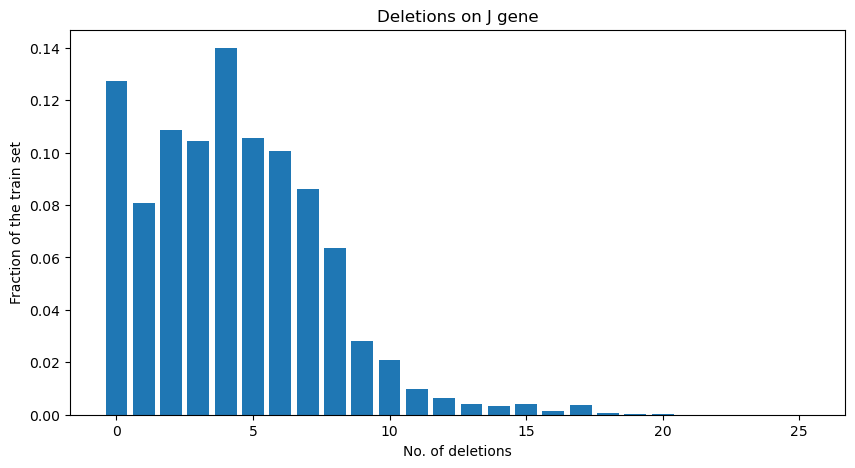

In [22]:
fig = plt.figure(figsize = (10,5))
plt.bar(j_deletion_count_sorted.keys(), j_deletion_count_sorted.values())
plt.title("Deletions on J gene")
plt.xlabel("No. of deletions")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures", "J_deletion_train.png"))

# Distribution of Lengths of cdr3 sequences 

In [ ]:
cdr3 = data.loc[:, 'seq']

In [ ]:
@numba.jit(forceobj=True)
def count_seq_len(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append(len(data[i]))
    return result

In [ ]:
cdr3_lengths = count_seq_len(cdr3.to_numpy())

In [ ]:
cdr3_len_count = {}
for len_ in tqdm(cdr3_lengths, total = data.shape[0], position=0, leave=True):
    key = str(len_)
    if key not in cdr3_len_count.keys():
        cdr3_len_count[key] = 1
    else:
        cdr3_len_count[key] += 1
cdr3_len_count.update((x, y/data.shape[0]) for x, y in cdr3_len_count.items())

In [ ]:
cdr3_len_count

In [ ]:
sum(list(cdr3_len_count.values()))

In [ ]:
sorted_cdr3_len = dict(sorted(cdr3_len_count.items(), key = lambda x: x[1], reverse = True))

In [ ]:
sum(list(sorted_cdr3_len.values())[:9])

In [ ]:
list(sorted_cdr3_len.keys())[:9]

In [ ]:
print(pd.DataFrame(data={'len of cdr3': sorted_cdr3_len.keys(), 'fraction (%)': [f'{i*100:.3}'for i in sorted_cdr3_len.values()]}).to_latex(index=False))

In [ ]:
sorted_cdr3_len = {int(k):v for k,v in sorted_cdr3_len.items()}
sorted_cdr3_len= dict(sorted(sorted_cdr3_len.items(), reverse=False))

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.bar(sorted_cdr3_len.keys(), sorted_cdr3_len.values())
plt.title("Lengths of CDR3 sequences")
plt.xlabel("Length of CDR3 seq")
plt.ylabel("Fraction of the train set")
plt.show
plt.savefig(os.path.join("figures","CDR3_train.png"))

# The lengths of CDR3 sequence based on the invidual genes

In [12]:
@numba.jit(forceobj=True)
def gene_combination_cdr3(data):
    result = {}
    for i in tqdm(range(data.shape[0]), position = 0, leave = True):
        v = data[i, 3]
        j = data[i, 6]
        cdr3_len = len(data[i,1])
        if (v, j) not in result.keys():
            result[(v,j)] = [cdr3_len]
        else:
            result[(v,j)].append(cdr3_len)
    return result

In [31]:
gene_cdr3 = gene_combination_cdr3(data.to_numpy())

100%|██████████| 26427244/26427244 [00:34<00:00, 776586.10it/s]


In [33]:
for i in tqdm(gene_cdr3.keys(), total = len(gene_cdr3), position = 0, leave = True):
    cdr3_count = {}
    total = 0
    lengths = gene_cdr3[i]
    lengths.sort()
    for j in lengths:
        key = j
        if key not in cdr3_count.keys():
            cdr3_count[key] = 1
        else:
            cdr3_count[key] += 1
        total += 1
    cdr3_count.update((x, y/total) for x, y in cdr3_count.items())
    gene_cdr3[i] = cdr3_count

100%|██████████| 336/336 [00:09<00:00, 34.99it/s] 


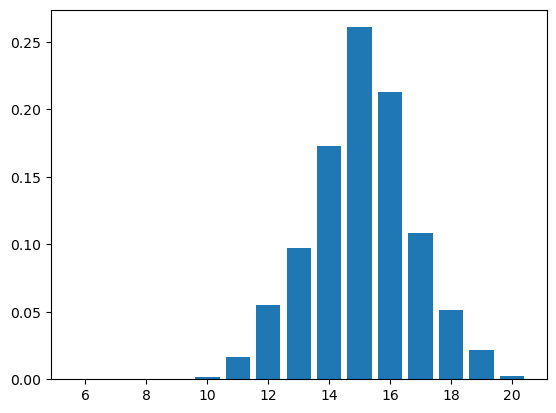

In [46]:
plt.bar(list(gene_cdr3.values())[0].keys(), list(gene_cdr3.values())[0].values() )
plt.show()

# Specific V gene deletions 

In [23]:
v_genes_deletions = data.loc[:,['v', 'v_deletions']]

In [24]:
@numba.jit(forceobj=True)
def create_list(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append((data[i, 0], data[i, 1]))
    return result 

In [25]:
v_genes_deletions

,v,v_deletions
0,TRBV11-2,6
1,TRBV7-8,5
2,TRBV11-2,5
3,TRBV4-2,4
4,TRBV7-2,1
...,...,...
26427239,TRBV5-4,0
26427240,TRBV5-4,4
26427241,TRBV29-1,6
26427242,TRBV4-2,3


In [26]:
v_genes_deletions_list = create_list(v_genes_deletions.to_numpy())

100%|██████████| 26427244/26427244 [00:15<00:00, 1749987.25it/s]


In [27]:
gene_deletion_list = {}
for i in tqdm(v_genes_deletions_list, total = data.shape[0], position=0, leave=True):
    key = str(i[0])
    value = i[1]
    if key not in gene_deletion_list.keys():
        gene_deletion_list[key] = [value]
    else:
        gene_deletion_list[key].append(value)

100%|██████████| 26427244/26427244 [00:15<00:00, 1658559.61it/s]


In [28]:
v_gene_deletions = {}
for i in tqdm(gene_deletion_list.keys(), total = len(gene_deletion_list), position = 0, leave = True):
    gene_count = {}
    total = 0
    for j in gene_deletion_list[i]:
        key = j
        if key not in gene_count.keys():
            gene_count[key] = 1
        else:
            gene_count[key] += 1
        total += 1
    gene_count.update((x, y/total) for x, y in gene_count.items())
    v_gene_deletions[i] = gene_count

100%|██████████| 28/28 [00:07<00:00,  3.69it/s]


In [29]:
v_gene_deletions

{'TRBV11-2': {6: 0.0668108329813349,
  5: 0.2780749358750681,
  1: 0.1634565940019467,
  4: 0.11934047737109205,
  7: 0.030956731740463903,
  3: 0.112136752921587,
  0: 0.10246597858625187,
  2: 0.0933775320930745,
  10: 0.004691526938593108,
  8: 0.0216769817511769,
  11: 0.0026476403861575852,
  9: 0.0034113239426273164,
  14: 0.00011019081375915961,
  12: 0.0006014581917687462,
  13: 0.00019283392407852933,
  15: 4.361719711300068e-05,
  22: 7.652139844386084e-07,
  16: 7.652139844386084e-07,
  18: 7.652139844386084e-07,
  25: 1.5304279688772168e-06,
  21: 7.652139844386084e-07},
 'TRBV7-8': {5: 0.2964615149549796,
  0: 0.07697650092049547,
  4: 0.11355377499308159,
  1: 0.17956126076359988,
  3: 0.10272473071634101,
  2: 0.10794318678418521,
  6: 0.056056732011338706,
  8: 0.021752114788937814,
  7: 0.03154900743555196,
  11: 0.0028966491400339136,
  10: 0.005610588208896377,
  9: 0.003424478234529212,
  14: 0.00021049054982909664,
  12: 0.0008889753170447127,
  13: 0.0003152015847

In [30]:
trbv112 = v_gene_deletions['TRBV11-2']

In [31]:
trbv112 = {int(k): v for k,v in trbv112.items()}
trbv112 = dict(sorted(trbv112.items()))
trbv112

{0: 0.10246597858625187,
 1: 0.1634565940019467,
 2: 0.0933775320930745,
 3: 0.112136752921587,
 4: 0.11934047737109205,
 5: 0.2780749358750681,
 6: 0.0668108329813349,
 7: 0.030956731740463903,
 8: 0.0216769817511769,
 9: 0.0034113239426273164,
 10: 0.004691526938593108,
 11: 0.0026476403861575852,
 12: 0.0006014581917687462,
 13: 0.00019283392407852933,
 14: 0.00011019081375915961,
 15: 4.361719711300068e-05,
 16: 7.652139844386084e-07,
 18: 7.652139844386084e-07,
 21: 7.652139844386084e-07,
 22: 7.652139844386084e-07,
 25: 1.5304279688772168e-06}

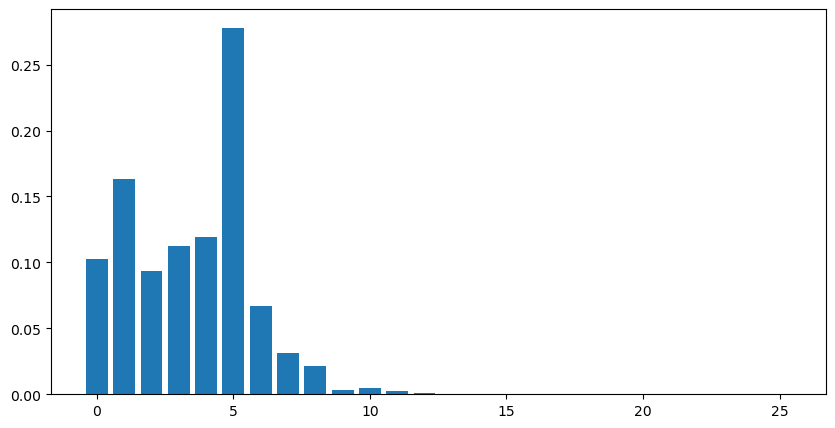

In [32]:
fig = plt.figure(figsize = (10,5))
plt.bar(trbv112.keys(), trbv112.values())
plt.show()

In [33]:
len(v_gene_deletions)

28

# Specific J gene deletions 

In [ ]:
j_genes_deletions = data.loc[:,['j', 'j_deletions']]

In [ ]:
@numba.jit(forceobj=True)
def create_list(data):
    result = []
    for i in tqdm(range(len(data)),position=0, leave=True):
        result.append((data[i, 0], data[i, 1]))
    return result 

In [ ]:
j_genes_deletions

In [ ]:
j_genes_deletions_list = create_list(j_genes_deletions.to_numpy())

In [ ]:
gene_deletion_list = {}
for i in tqdm(j_genes_deletions_list, total = data.shape[0], position=0, leave=True):
    key = str(i[0])
    value = i[1]
    if key not in gene_deletion_list.keys():
        gene_deletion_list[key] = [value]
    else:
        gene_deletion_list[key].append(value)

In [ ]:
j_gene_deletions = {}
for i in tqdm(gene_deletion_list.keys(), total = len(gene_deletion_list), position = 0, leave = True):
    gene_count = {}
    total = 0
    for j in gene_deletion_list[i]:
        key = j
        if key not in gene_count.keys():
            gene_count[key] = 1
        else:
            gene_count[key] += 1
        total += 1
    gene_count.update((x, y/total) for x, y in gene_count.items())
    j_gene_deletions[i] = gene_count

In [ ]:
j_gene_deletions

# Beginning and ending of the CDR3 sequences

In [6]:
data.head()

,patient_id,seq,nn,v,v_allele,v_deletions,j,j_allele,j_deletions
0,P00421,CASSSPRLAGVPDTQYF,GCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCAGTTCAC...,TRBV11-2,2.0,6,TRBJ2-3,1.0,4
1,P00245,CASSPEGQGANTGELFF,ACACAGCAGGAGGACTCCGCCGTGTATCTCTGTGCCAGCAGCCCAG...,TRBV7-8,1.0,5,TRBJ2-2,1.0,0
2,P00473,CASSTGTSGFYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TRBV11-2,2.0,5,TRBJ2-7,1.0,3
3,P00484,CASSRAGQTSEKLFF,CACGCCCTGCAGCCAGAAGACTCGGCCCTGTATCTCTGTGCCAGCA...,TRBV4-2,1.0,4,TRBJ1-4,1.0,7
4,P00440,CASSLGGIYSNTGELFF,ACACAGCAGGAGGACTCGGCCGTGTATCTCTGTGCCAGCAGCTTAG...,TRBV7-2,1.0,1,TRBJ2-2,1.0,0


In [7]:
@numba.jit(forceobj=True)
def fix_gene_codes(data):
    
    for i in tqdm(range(len(data)),position=0, leave=True):
        v_gene_family = data[i,3]
        j_gene_family = data[i,6]

        new_v_code = v_gene_family + '*0' + str(int(data[i,4]))
        data[i,3] = new_v_code

        new_j_code = j_gene_family + '*0' + str(int(data[i,7]))
        data[i,6] = new_j_code
    
    return data

In [8]:
new_df = fix_gene_codes(data.to_numpy())
new_df = pd.DataFrame(data=new_df).iloc[:,[1,3,6]]
new_df = new_df.rename(columns = {1:'seq', 3:'v', 6:'j'})

100%|██████████| 26427244/26427244 [00:49<00:00, 533042.24it/s]


In [9]:
new_df

,seq,v,j
0,CASSSPRLAGVPDTQYF,TRBV11-2*02,TRBJ2-3*01
1,CASSPEGQGANTGELFF,TRBV7-8*01,TRBJ2-2*01
2,CASSTGTSGFYEQYF,TRBV11-2*02,TRBJ2-7*01
3,CASSRAGQTSEKLFF,TRBV4-2*01,TRBJ1-4*01
4,CASSLGGIYSNTGELFF,TRBV7-2*01,TRBJ2-2*01
...,...,...,...
26427239,CASSLGQEFGTDTQYF,TRBV5-4*01,TRBJ2-3*01
26427240,CASSPRTSGRRGNIQYF,TRBV5-4*01,TRBJ2-4*01
26427241,CSVGAGTYEQYF,TRBV29-1*01,TRBJ2-7*01
26427242,CASSQIRQGPNTEAFF,TRBV4-2*01,TRBJ1-1*01


In [10]:
@numba.jit(forceobj=True)
def CDR3_amino_acids_distribution(start, end, data, desc=False):
    if desc:
        step = -1
    else:
        step = 1
    CDR3_positions = {}
    for j in range(start, end, step):
        cdr3_elements = {}
        for i in range(len(data)):
            if (len(data[i])-1 < j):
                continue
            else:
                key = list(data[i])[j]
                if key not in cdr3_elements.keys():
                    cdr3_elements[key] = 1
                else:
                    cdr3_elements[key] += 1
        cdr3_elements_list = [(x, y / len(data)) for x, y in cdr3_elements.items()]
        cdr3_elements = {}
        for x, y in cdr3_elements_list:
            cdr3_elements[x] = y

        CDR3_positions[j] = cdr3_elements
    return CDR3_positions

In [11]:
@numba.jit(forceobj=True)
def seq_gene_dict(data, v_gene = True):
    gene = 1 if v_gene else 2
    result = {}
    for i in tqdm(range(len(data)),position=0, leave=True):
        key = data[i, gene]
        value = data[i, 0]
        if key not in result.keys():
            result[key] = [value]
        else:
            result[key].append(value)
    return result

In [12]:
v_gene_cdr3_dict = seq_gene_dict(new_df.to_numpy())
j_gene_cdr3_dict = seq_gene_dict(new_df.to_numpy(), v_gene = False)

100%|██████████| 26427244/26427244 [00:24<00:00, 1057513.99it/s]


In [13]:
v_gene = {}
for k, v in tqdm(v_gene_cdr3_dict.items(), position = 0, leave= True):
    v_gene[k] = CDR3_amino_acids_distribution(0,3, v)

100%|██████████| 31/31 [01:25<00:00,  2.74s/it]


In [ ]:
v_gene

In [ ]:
for k, v in v_gene.items():
    for i, j in v.items():
        if list(j.values())[0] == 1.0:
            print(f'{k}: position {i}, amino acid {list(j.keys())[0]}')
            
    

In [16]:
j_gene = {}
for k, v in tqdm(j_gene_cdr3_dict.items(), position = 0, leave= True):
    j_gene[k] = CDR3_amino_acids_distribution(-1,-3, v, desc = True)

100%|██████████| 12/12 [00:55<00:00,  4.66s/it]


In [17]:
j_gene

{'TRBJ2-3*01': {-1: {'F': 0.9997666122095156, 'V': 0.00023338779048444637},
  -2: {'Y': 0.9976754026111248,
   'P': 5.430820456044555e-05,
   'F': 0.00015570643459418882,
   'C': 0.00014745708706601987,
   'L': 0.00011789692509008116,
   'V': 0.00013508306577376646,
   'T': 6.530733459800413e-05,
   'H': 0.00042930979427845877,
   'D': 0.0004134985448494683,
   'N': 0.00022720077983831967,
   'R': 6.908828554841491e-05,
   'S': 0.00016361205930868404,
   'A': 6.530733459800413e-05,
   'G': 0.00011824064790375486,
   'I': 7.561901900821531e-05,
   'W': 1.1686575664906004e-05,
   'Q': 1.8561031938380123e-05,
   'K': 1.787358631103271e-05,
   'E': 3.196622167165466e-05,
   'M': 6.87445627347412e-06}},
 'TRBJ2-2*01': {-1: {'F': 0.9999989981586155, 'V': 1.001841384464646e-06},
  -2: {'F': 0.9982312490357277,
   'L': 0.0006166333721379896,
   'Y': 0.000404743919323717,
   'V': 0.00046886176792945434,
   'S': 0.00016881027328229285,
   'I': 4.157641745528281e-05,
   'H': 5.510127614555553e-06

In [18]:
for k, v in j_gene.items():
    for i, j in v.items():
        if list(j.values())[0] == 1.0:
            print(f'{k}: position {i}, amino acid {list(j.keys())[0]}')

TRBJ2-1*01: position -1, amino acid F
TRBJ2-6*01: position -1, amino acid F


In [19]:
new_df["j"].value_counts()["TRBJ2-1*01"]

3877777

In [20]:
new_df["j"].value_counts()["TRBJ2-6*01"]

467387